In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
%matplotlib notebook

In [3]:
# Simple func R2 -> R, f = x^2 + y^2
def func(in_vec):
    assert in_vec.shape == (2,)
    return in_vec[0]**2 + in_vec[1]**2

In [33]:
def DE_optimiser(f, limits, F, CR, n_candidates=100, max_iter=1000, min_term=1e-5):
    assert limits.shape[1] == 2, 'Limits should be N x 2 matrix, min and max per parameter.'
    assert n_candidates >= 4
    assert 0 <= F <= 1
    assert 0 <= CR <= 1
    
    n_dims = limits.shape[0]

    candidates = np.zeros((n_candidates, n_dims))
    for candidate_ind in range(n_candidates):
        for dim_ind in range(n_dims):
            candidates[candidate_ind, dim_ind] = np.random.uniform(*limits[dim_ind])
    
    best_val = np.inf
    for candidate in candidates:
        current_val = f(candidate)
        if current_val < best_val:
            best_candidate = candidate
            best_val = current_val
            
    print('Initial best {}'.format(best_val))
    
    iters = 0
    while iters < max_iter and best_val > min_term:
        for candidate_ind, x in enumerate(candidates):
            indices = np.random.choice(
                list(set(range(0, n_candidates)) - set([candidate_ind])),
                3
            )
            a, b, c = candidates[indices]
            R = np.random.randint(n_dims)
            r = np.random.uniform(0., 1., n_dims)
            
            y = np.zeros_like(x)
            for i in range(n_dims):
                if r[i] < CR or i == R:
                    y[i] = a[i] + F * (b[i] - c[i])
                else:
                    y[i] = x[i]
            
            f_of_x = f(x)
            if f_of_x < best_val:
                best_val = f_of_x

            if f(y) < f(x):
                candidates[candidate_ind] = y
            
        iters += 1
    
    print('Iters: {}'.format(iters))
    best_val = np.inf
    for candidate in candidates:
        current_val = f(candidate)
        if current_val < best_val:
            best_candidate = candidate
            best_val = current_val
    
    return best_candidate, best_val

In [5]:
# Plot a range of values for visulation
mat_shape = 201
values_x = np.linspace(-100, 100, mat_shape)
values_y = np.linspace(-100, 100, mat_shape)
X, Y = np.meshgrid(values_x, values_y)

In [6]:
# Obviously this can be vectorised, but the aim is to write a 
# blackbox optimiser, so just operate on 2-vectors.
theta = np.dstack([X, Y])
Z = np.zeros((mat_shape, mat_shape))
for r in range(mat_shape):
    for c in range(mat_shape):
        Z[r, c] = func(theta[r, c, :])

<IPython.core.display.Javascript object>


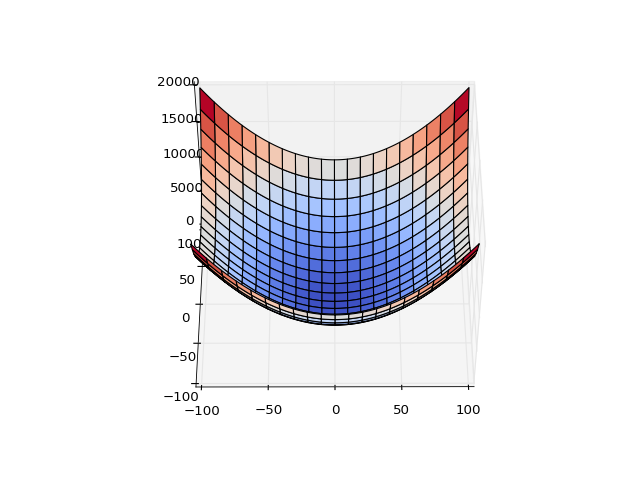

In [7]:
# Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')

In [22]:
print('Min cost is {}'.format(np.min(Z)))
min_ind = np.unravel_index(np.argmin(Z), Z.shape)
print('Parameters for min: {}'.format(theta[min_ind]))

Min cost is 0.0
Parameters for min: [ 0.  0.]


In [35]:
DE_optimiser(func, np.array([[-100, 100],[-100, 100]]), 0.5, 0.5)

Initial best 91.82992534289556
Iters: 21


(array([ 0.00245277, -0.00140428]), 7.9880912939164188e-06)

In [103]:
np.random.randint(2)

0